In [1]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
# import ASRE models
cur_dir = os.getcwd()
ASREp_dir = os.path.join(os.path.dirname(os.path.dirname(cur_dir)))
sys.path.append(ASREp_dir)
import ASREp.ground_deformation_models as gdm
import ASREp
import pandas as pd
from scipy import interpolate
np.set_printoptions(threshold=np.inf)

<Token var=<ContextVar name='format_options' default={'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': 9223372036854775807, 'override_repr': None} at 0x000002122863BD80> at 0x000002125AB5F580>

In [2]:
def prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX):
    ## Prepare Ux-GF
    # Read Ux-GF and Uz-GF
    dispX_gf_file = os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux-GF.csv")
    dispX_gf = pd.read_csv(dispX_gf_file, header=None)

    dispZ_gf_file = os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz-GF.csv")
    dispZ_gf = pd.read_csv(dispZ_gf_file, header=None)
    # Add the left half of Ux-GF and Uz-GF
    left_half = dispX_gf.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispX_gf = pd.concat([left_half, dispX_gf])
    dispX_gf = dispX_gf.sort_values(by = 0).reset_index(drop = True)

    left_half = dispZ_gf.copy()
    left_half[0] = -left_half[0]
    dispZ_gf = pd.concat([left_half, dispZ_gf])
    dispZ_gf = dispZ_gf.sort_values(by = 0).reset_index(drop = True)
    # Interpolate the dispX_gf with beamX mesh
    f = interpolate.interp1d(dispX_gf[0], dispX_gf[1], fill_value='extrapolate')
    dispX_gf = f(beamX)

    f = interpolate.interp1d(dispZ_gf[0], dispZ_gf[1], fill_value='extrapolate')
    dispZ_gf = f(beamX)
    return dispX_gf/1000, dispZ_gf/1000

def plot_verification(val_data_dir, vl, beam_id, beamX, model, axes, model_el = None,
                      beam_nodes_ind = None):
    
    ## Prepare Ux-GF
    # Read Ux-GF and Uz-GF
    dispX_gf_file = os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux-GF.csv")
    dispX_gf = pd.read_csv(dispX_gf_file, header=None)

    dispZ_gf_file = os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz-GF.csv")
    dispZ_gf = pd.read_csv(dispZ_gf_file, header=None)

    dispL_asre_file =  os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux.csv")
    dispL_asre_Franza = pd.read_csv(dispL_asre_file, header=None)

    dispV_asre_file =  os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz.csv")
    dispV_asre_Franza = pd.read_csv(dispV_asre_file, header=None)

    # Sort the disp in file from left to right
    left_half = dispX_gf.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispX_gf = pd.concat([left_half, dispX_gf])
    dispX_gf = dispX_gf.sort_values(by = 0).reset_index(drop = True)
    
    left_half = dispZ_gf.copy()
    left_half[0] = -left_half[0]
    dispZ_gf = pd.concat([left_half, dispZ_gf])
    dispZ_gf = dispZ_gf.sort_values(by = 0).reset_index(drop = True)
    
    left_half = dispL_asre_Franza.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispL_asre_Franza = pd.concat([left_half, dispL_asre_Franza])
    dispL_asre_Franza = dispL_asre_Franza.sort_values(by = 0).reset_index(drop = True)

    left_half = dispV_asre_Franza.copy()
    left_half[0] = -left_half[0]
    dispV_asre_Franza = pd.concat([left_half, dispV_asre_Franza])
    dispV_asre_Franza = dispV_asre_Franza.sort_values(by = 0).reset_index(drop = True)
    # Interpolate the dispX_gf with beamX mesh
    f = interpolate.interp1d(dispX_gf[0], dispX_gf[1], fill_value='extrapolate')
    dispX_gf = f(beamX)

    f = interpolate.interp1d(dispZ_gf[0], dispZ_gf[1], fill_value='extrapolate')
    dispZ_gf = f(beamX)

    f = interpolate.interp1d(dispL_asre_Franza[0], dispL_asre_Franza[1], fill_value='extrapolate')
    dispL_asre_Franza = f(beamX)

    f = interpolate.interp1d(dispV_asre_Franza[0], dispV_asre_Franza[1], fill_value='extrapolate')
    dispV_asre_Franza = f(beamX)
    
    axes[0].plot(beamX, dispX_gf, 'r:', label = 'experiment')
    axes[1].plot(beamX, dispZ_gf, 'r:', label = 'experiment')

    axes[0].plot(beamX, dispL_asre_Franza, 'b', label = 'ASRE_Franza')
    axes[1].plot(beamX, dispV_asre_Franza, 'b', label = 'ASRE_Franza')
    
    if getattr(model, 'footing_nodes_ind', None) is not None:
        if model_el is not None:
            axes[0].plot(beamX, model.beam_DispL[model.footing_nodes_ind]*1000, 'bx', label = 'ASREp_ep')
            axes[1].plot(beamX, model.beam_DispV[model.footing_nodes_ind]*1000, 'bx', label = 'ASREp_ep')

            axes[0].plot(beamX, model_el.beam_DispL[model.footing_nodes_ind]*1000, 'b^', label = 'ASREp_el')
            axes[1].plot(beamX, model_el.beam_DispV[model.footing_nodes_ind]*1000, 'b^', label = 'ASREp_el')
        else:
            axes[0].plot(beamX, model.beam_DispL[model.footing_nodes_ind]*1000, 'bx', label = 'ASREp')
            axes[1].plot(beamX, model.beam_DispV[model.footing_nodes_ind]*1000, 'bx', label = 'ASREp')
    else:
        if model_el is not None:
            axes[0].plot(beamX, model.beam_DispL*1000, 'bx', label = 'ASREp_ep')
            axes[1].plot(beamX, model.beam_DispV*1000, 'bx', label = 'ASREp_ep')

            axes[0].plot(beamX, model_el.beam_DispL*1000, 'b^', label = 'ASREp_el')
            axes[1].plot(beamX, model_el.beam_DispV*1000, 'b^', label = 'ASREp_el')
        else:
            axes[0].plot(beamX, model.beam_DispL*1000, 'bx', label = 'ASREp')
            axes[1].plot(beamX, model.beam_DispV*1000, 'bx', label = 'ASREp')

    axes[0].legend()
    axes[1].legend()

    axes[0].set_title(f'{beam_id}, Ux')
    axes[1].set_title(f'{beam_id}, Uz')

    axes[0].set_xlim([0, 15])
    axes[1].set_xlim([0, 15])
    axes[0].set_ylim([-60, 36])
    axes[1].set_ylim([-60, 36])

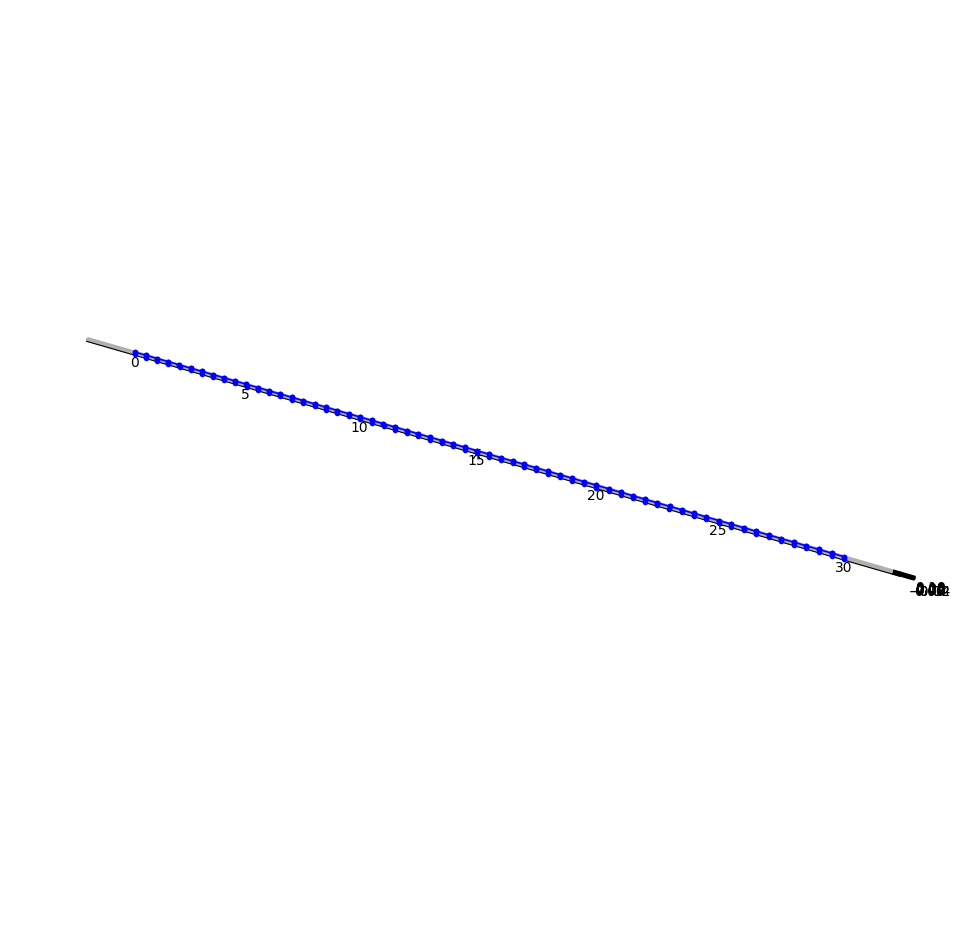

In [3]:
## Create a frame model that is equivalent to STR-1
beam_to_node = {}
# Clear existing model
ops.wipe()

# Define Model Builder
ops.model('basic', '-ndm', 3, '-ndf', 6)  # 3D model with 6 DOF per node

# Define parameters
n_bay = 60        # Number of bays
l_bay = 0.5      # Length of each bay
h_bay = 0.1      # Height of each story
numStories = 1  # Number of stories

# Material properties frame
b_frame = 10
d_beam = 0.12
d_column = 0.12
E = 70e9  # Young's Modulus in Pa
E_column = E * 10000
A_beam = b_frame * d_beam   # Area of the element in m^2
A_column = b_frame * d_column
mu = 0.28
G = E/(2*(1+mu))
G_column = E_column/(2*(1+mu))
Iy_beam = b_frame * d_beam**3/12
Iz_beam = d_beam**3 * b_frame/12  # Moment of Inertia in m^4
Iy_column = b_frame * d_column**3/12
Iz_column = d_column**3 * b_frame/12  # Moment of Inertia in m^4

# calculate torsional constant for beam
a = max(b_frame, d_beam)
b = min(b_frame, d_beam)
J_beam = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))
# calculate torsional constant for column
a = max(b_frame, d_column)
b = min(b_frame, d_column)
J_column = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))

# Define footing meshing parameters
num_nodes_in_frame = (n_bay + 1) * (numStories + 1)
num_elems_in_frame = n_bay * numStories + (n_bay + 1) * numStories

footing_nodes_ind = []
footing_coord_x = []
footing_coord_y = []
footing_coord_z = []

beam_nodes_ind = []
beam_nodes_coord_x = []

# Create nodes
for i in range(numStories + 1):
    for j in range(n_bay + 1):
        nodeTag = i * (n_bay + 1) + j + 0
        x = j * l_bay
        z = i * h_bay
        ops.node(nodeTag, x, 0, z)
        if i == 0:
            footing_nodes_ind.append(nodeTag)
            footing_coord_x.append(x)
            footing_coord_y.append(0)
            footing_coord_z.append(z)
        if i == 1:
            beam_nodes_ind.append(nodeTag)
            beam_nodes_coord_x.append(x)
beam_nodes_ind = np.array(beam_nodes_ind).astype(int)
beam_nodes_coord_x = np.array(beam_nodes_coord_x).astype(float)
# Define geometric transformation
horizontal_gTTag = 1
vertical_gTTag = 2
ops.geomTransf('Linear', horizontal_gTTag, 0, 0, 1)
ops.geomTransf('Linear', vertical_gTTag, 0, 1, 0)
# Define elements
for i in range(numStories):
    for j in range(n_bay):
        # Horizontal elements (beams)
        nodeI = (i + 1) * (n_bay + 1) + j + 0
        nodeJ = nodeI + 1
        eleTag = i * (n_bay) + j + 0
        ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_beam, E, G, J_beam, Iy_beam, Iz_beam, horizontal_gTTag)
        beam_to_node[eleTag] = {'nodes':[nodeI, nodeJ],
                                'length': l_bay}

    for j in range(n_bay + 1):
        if i < numStories:
            # Vertical elements (columns)
            nodeI = i * (n_bay + 1) + j + 0
            nodeJ = nodeI + (n_bay + 1)
            eleTag = n_bay * numStories + i * (n_bay + 1) + j + 0
            ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_column, E_column, G_column, J_column, Iy_column, Iz_column, vertical_gTTag)


footing_nodes_ind = np.array(footing_nodes_ind).astype(int)
footing_coord_x = np.array(footing_coord_x).astype(float)
footing_coord_y = np.array(footing_coord_y).astype(float)
footing_coord_z = np.array(footing_coord_z).astype(float)

# Calculate the self weight loads (simplified as point loads, needs refinement)
num_of_nodes = num_nodes_in_frame + len(footing_nodes_ind) - (n_bay + 1)
self_weight_unit = np.zeros(num_of_nodes * 6).astype(float)
for _, nodes in beam_to_node.items():
    nodeI = nodes['nodes'][0]
    nodeJ = nodes['nodes'][1]
    length = nodes['length']
    self_weight_unit[nodeI * 6 + 2] += (-1/2*length)
    self_weight_unit[nodeJ * 6 + 2] += (-1/2*length)

# Define the time series
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)

# Define the constraint method
ops.constraints("Plain")

opsv.plot_model(element_labels=0, fig_wi_he = (50,30), local_axes=0,
                node_labels=0);

In [4]:
val_data_dir = r"VerificationData"

In [5]:
footing_coord_x = footing_coord_x - 15 

In [6]:
beam_id = "STR-1"
z0 = 11.25
vl = 2.0/100
k = 0.55


dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, footing_coord_x)

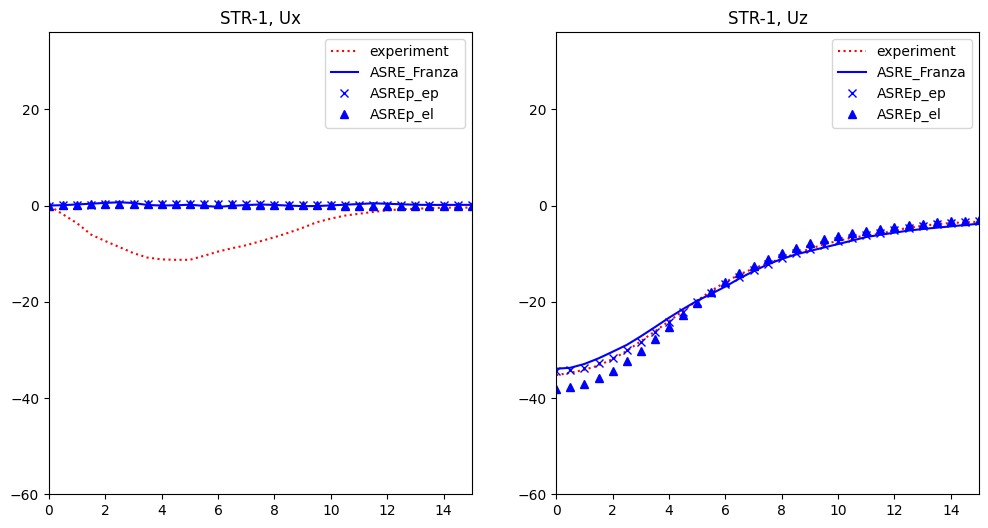

In [7]:
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
qz = 3.2*10*1000 * self_weight_unit
ele_length = footing_coord_x[1] - footing_coord_x[0]
ele_width = b_frame
footing_ele_length = ele_length * np.ones_like(footing_nodes_ind).astype(float)
footing_ele_width = ele_width * np.ones_like(footing_nodes_ind).astype(float)

model = ASREp.ASRE_2D_frame_model(ops, footing_nodes_ind, footing_coord_x, 
                                   footing_coord_y, footing_coord_z,
                                   footing_ele_length, footing_ele_width, 
                                   qz, 'elasto-plastic')
model_el = ASREp.ASRE_2D_frame_model(ops, footing_nodes_ind, footing_coord_x, 
                                   footing_coord_y, footing_coord_z,
                                   footing_ele_length, footing_ele_width, 
                                   qz, 'elastic')
model.set_soil_properties(Es, nis, mu_int)
model_el.set_soil_properties(Es, nis, mu_int)
model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')
model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
plot_verification(val_data_dir, vl, beam_id, footing_coord_x, model, axes, model_el)

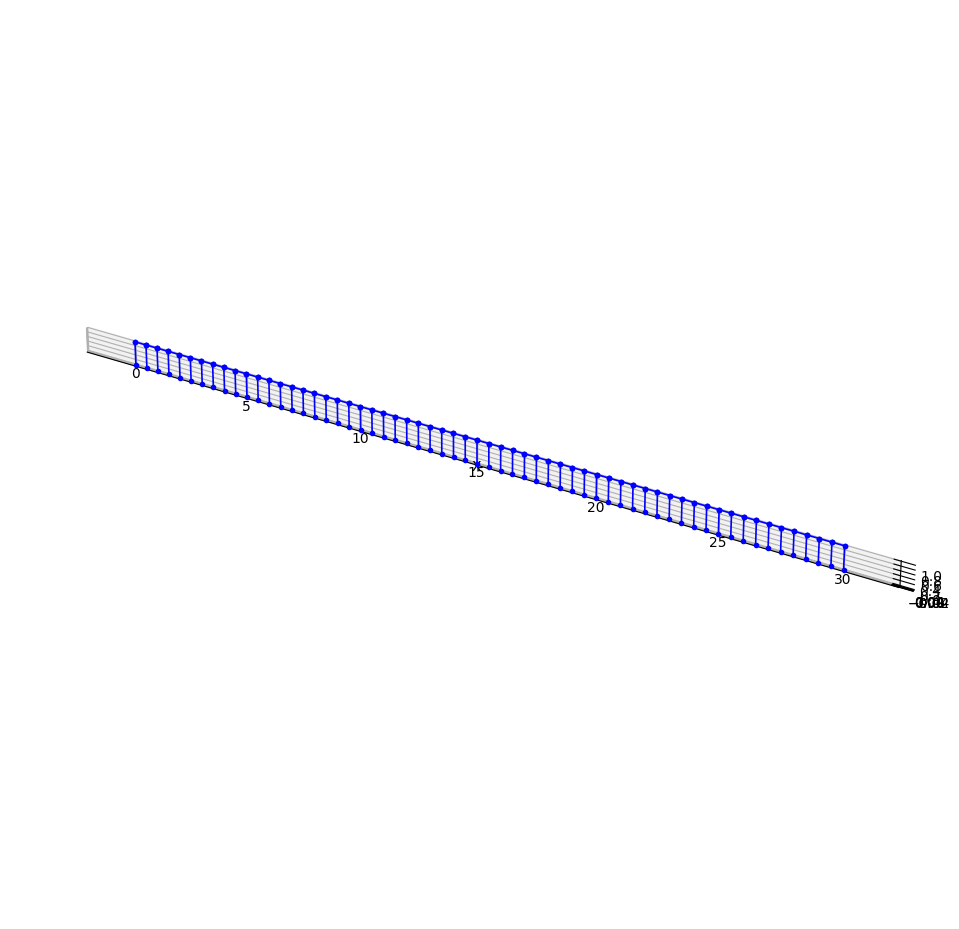

In [8]:
## Create a frame model that is equivalent to STR-1 but has 1 m offset from ground
beam_to_node = {}
# Clear existing model
ops.wipe()

# Define Model Builder
ops.model('basic', '-ndm', 3, '-ndf', 6)  # 3D model with 6 DOF per node

# Define parameters
n_bay = 60        # Number of bays
l_bay = 0.5      # Length of each bay
# h_bay_1 = 0.1      # Height of each story
# h_bay_2 = 1.0      # Height of each story
# numStories = 2  # Number of stories

h_bay_1 = 1.0      # Height of each story
h_bay_2 = 1.0      # Height of each story
numStories = 1  # Number of stories

# Material properties frame
b_frame = 10
d_beam = 0.12
d_column = 0.12*100
E = 70e9  # Young's Modulus in Pa
E_column = E * 10000
A_beam = b_frame * d_beam   # Area of the element in m^2
A_column = b_frame * d_column
mu = 0.28
G = E/(2*(1+mu))
G_column = E_column/(2*(1+mu))
Iy_beam = b_frame * d_beam**3/12
Iz_beam = d_beam**3 * b_frame/12  # Moment of Inertia in m^4
Iy_column = b_frame * d_column**3/12
Iz_column = d_column**3 * b_frame/12  # Moment of Inertia in m^4

# calculate torsional constant for beam
a = max(b_frame, d_beam)
b = min(b_frame, d_beam)
J_beam = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))
# calculate torsional constant for column
a = max(b_frame, d_column)
b = min(b_frame, d_column)
J_column = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))

# Define footing meshing parameters
num_nodes_in_frame = (n_bay + 1) * (numStories + 1)
num_elems_in_frame = n_bay * numStories + (n_bay + 1) * numStories

footing_nodes_ind = []
footing_coord_x = []
footing_coord_y = []
footing_coord_z = []

beam_nodes_ind = []
beam_coord_x = []

# Create nodes
for i in range(numStories + 1):
    for j in range(n_bay + 1):
        nodeTag = i * (n_bay + 1) + j + 0
        x = j * l_bay
        if i == 0:
            z = 0
        if i == 1:
            z = h_bay_1
        if i == 2:
            z = h_bay_1 + h_bay_2
        ops.node(nodeTag, x, 0, z)
        if i == 0:
            footing_nodes_ind.append(nodeTag)
            footing_coord_x.append(x)
            footing_coord_y.append(0)
            footing_coord_z.append(z)
        if i == 1:
            beam_nodes_ind.append(nodeTag)
            beam_coord_x.append(x)
beam_nodes_ind = np.array(beam_nodes_ind).astype(int)
beam_coord_x = np.array(beam_coord_x).astype(float)

# Define geometric transformation
horizontal_gTTag = 1
vertical_gTTag = 2
ops.geomTransf('Linear', horizontal_gTTag, 0, 0, 1)
ops.geomTransf('Linear', vertical_gTTag, 0, 1, 0)
# Define elements
for i in range(numStories):
    for j in range(n_bay):
        # Horizontal elements (beams)
        nodeI = (i + 1) * (n_bay + 1) + j + 0
        nodeJ = nodeI + 1
        eleTag = i * (n_bay) + j + 0
        ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_beam, E, G, J_beam, Iy_beam, Iz_beam, horizontal_gTTag)
        beam_to_node[eleTag] = {'nodes':[nodeI, nodeJ],
                                'length': l_bay}

    for j in range(n_bay + 1):
        if i < numStories:
            # Vertical elements (columns)
            nodeI = i * (n_bay + 1) + j + 0
            nodeJ = nodeI + (n_bay + 1)
            eleTag = n_bay * numStories + i * (n_bay + 1) + j + 0
            ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_column, E_column, G_column, J_column, Iy_column, Iz_column, vertical_gTTag)


footing_nodes_ind = np.array(footing_nodes_ind).astype(int)
footing_coord_x = np.array(footing_coord_x).astype(float)
footing_coord_y = np.array(footing_coord_y).astype(float)
footing_coord_z = np.array(footing_coord_z).astype(float)

# Calculate the self weight loads (simplified as point loads, needs refinement)
num_of_nodes = num_nodes_in_frame + len(footing_nodes_ind) - (n_bay + 1)
self_weight_unit = np.zeros(num_of_nodes * 6).astype(float)
for _, nodes in beam_to_node.items():
    nodeI = nodes['nodes'][0]
    nodeJ = nodes['nodes'][1]
    length = nodes['length']
    self_weight_unit[nodeI * 6 + 2] += (-1/2*length)
    self_weight_unit[nodeJ * 6 + 2] += (-1/2*length)

# Define the time series
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)

# Define the constraint method
ops.constraints("Plain")

opsv.plot_model(element_labels=0, fig_wi_he = (50,30), local_axes=0,
                node_labels=0);

In [9]:
footing_coord_x = footing_coord_x - 15 
beam_coord_x = beam_coord_x - 15

In [10]:
beam_id = "STR-1"
z0 = 11.25
vl = 2.0/100
k = 0.55


dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, footing_coord_x)
dispX_gf = dispX_gf * 0.0 # if no horiztonal displacement for testing

In [11]:
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
qz = 3.2*10*1000 * self_weight_unit
ele_length = footing_coord_x[1] - footing_coord_x[0]
ele_width = b_frame
footing_ele_length = ele_length * np.ones_like(footing_nodes_ind).astype(float)
footing_ele_width = ele_width * np.ones_like(footing_nodes_ind).astype(float)

model = ASREp.ASRE_2D_frame_model(ops, footing_nodes_ind, footing_coord_x, 
                                   footing_coord_y, footing_coord_z,
                                   footing_ele_length, footing_ele_width, 
                                   qz, 'elasto-plastic')
model_el = ASREp.ASRE_2D_frame_model(ops, footing_nodes_ind, footing_coord_x, 
                                   footing_coord_y, footing_coord_z,
                                   footing_ele_length, footing_ele_width, 
                                   qz, 'elastic')
model.set_soil_properties(Es, nis, mu_int)
model_el.set_soil_properties(Es, nis, mu_int)
model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')
model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')


True

In [12]:
# STR-1, equivalent beam model with d_NA = 1 m
beam_id = "STR-1"
beamX = np.linspace(-15, 15, 61)
z0 = 11.25
vl = 2.0/100
k = 0.55

dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, beam_id, beamX)
dispX_gf = dispX_gf * 0.0 # if no horiztonal displacement for testing
dfoot = 0.12
bfoot = 10
beamY = np.zeros_like(beamX)
beamZ = np.zeros_like(beamX)
Eb = 70e9
EoverG = 0.001 # Assume very large G to model the Euler–Bernoulli beam used in Franza and DeJong
qfoot = 3.2*10*1000
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
d_na = 1
beam_model = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot)
beam_model.set_beam_properties(Eb, EoverG, qfoot, d_NA=d_na)
beam_model.set_soil_properties(Es, nis, mu_int)

beam_model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

beam_model_el = ASREp.ASRE_Timoshenko_model(beamX.size, beamX, beamY,
                                     beamZ, dfoot, bfoot,
                                     solver='elastic')
beam_model_el.set_beam_properties(Eb, EoverG, qfoot, d_NA=d_na)
beam_model_el.set_soil_properties(Es, nis, mu_int)

beam_model_el.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

True

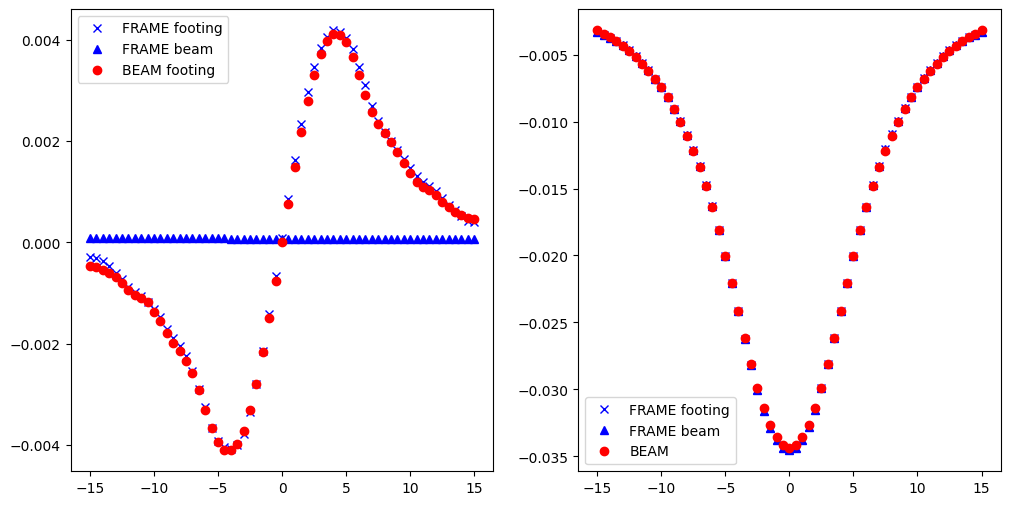

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
# axes[0].plot(beam_coord_x, model.result_array_ptr[beam_nodes_ind * 6 + 0], 'bx', label = 'FRAME')
axes[0].plot(footing_coord_x, model.result_array_ptr[footing_nodes_ind * 6 + 0], 'bx', label = 'FRAME footing')
axes[0].plot(beam_coord_x, model.result_array_ptr[beam_nodes_ind * 6 + 0], 'b^', label = 'FRAME beam')
axes[0].plot(beamX, beam_model.beam_DispL, 'ro', label = 'BEAM footing')
axes[1].plot(footing_coord_x, model.result_array_ptr[footing_nodes_ind * 6 + 2], 'bx', label = 'FRAME footing')
axes[1].plot(beam_coord_x, model.result_array_ptr[beam_nodes_ind * 6 + 2], 'b^', label = 'FRAME beam')
axes[1].plot(beamX, beam_model.beam_DispV, 'ro', label = 'BEAM')
axes[0].legend()
axes[1].legend()

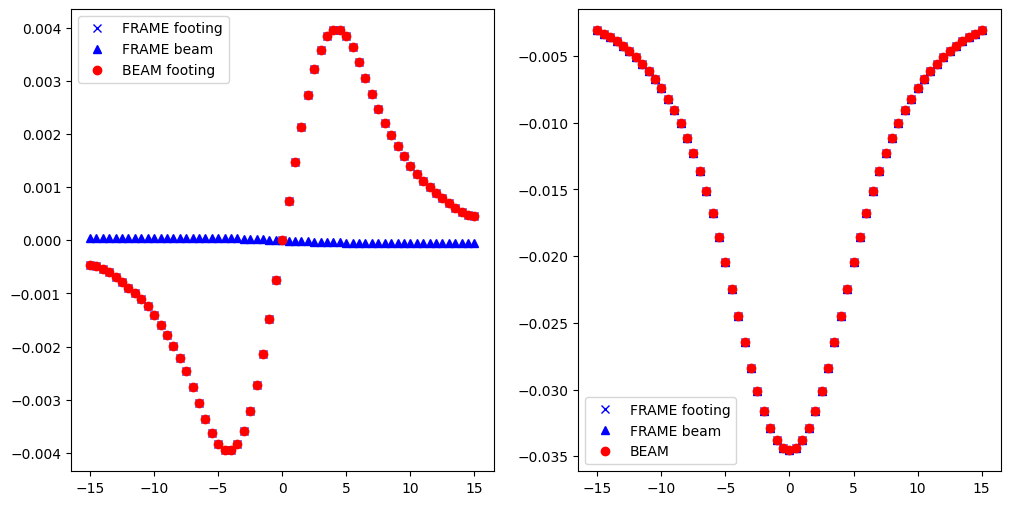

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                        figsize=(12, 6))
# axes[0].plot(beam_coord_x, model.result_array_ptr[beam_nodes_ind * 6 + 0], 'bx', label = 'FRAME')
axes[0].plot(footing_coord_x, model_el.result_array_ptr[footing_nodes_ind * 6 + 0], 'bx', label = 'FRAME footing')
axes[0].plot(beam_coord_x, model_el.result_array_ptr[beam_nodes_ind * 6 + 0], 'b^', label = 'FRAME beam')
axes[0].plot(beamX, beam_model_el.beam_DispL, 'ro', label = 'BEAM footing')
axes[1].plot(footing_coord_x, model_el.result_array_ptr[footing_nodes_ind * 6 + 2], 'bx', label = 'FRAME footing')
axes[1].plot(beam_coord_x, model_el.result_array_ptr[beam_nodes_ind * 6 + 2], 'b^', label = 'FRAME beam')
axes[1].plot(beamX, beam_model_el.beam_DispV, 'ro', label = 'BEAM')
axes[0].legend()
axes[1].legend()